各種ライブラリが必要となるため、プログラム実行時はインストールすること

py -m pip install <ライブラリ>

In [69]:
# 事前準備
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
plt.style.use("ggplot")
%matplotlib inline

# 少数第3位まで表示
%precision 3

# グラフの日本語表記対応
import japanize_matplotlib

# 第２章 数学的基礎

## 2-1 確率統計

### 2-1-1 統計学

統計学とは、データの平均や分散などの「統計量」にまとめ、その法則性や特徴を捉える学問である。以下に大別できる。

|項目|説明|例|
|---|---|---|
|記述統計学|手元にあるデータの特徴を捉える|テストの点数でAクラス、Bクラスで比較する際、クラスごとの平均点という指標で比較する|
|推計統計学|データの背景にある母集団の特徴を捉える|日本人全体の平均年収を求める際、必要最低限の数(標本数)を集め、母集団を推定する|

### 2-1-2 平均、分散

#### 2-1-2-1 平均

平均とは、すべてのデータの値を足して、データの数で割ったものである。よく利用される指標の１つである。

求め方は以下である。

$$
\bar x = \frac{x_1 + x_2 + \dots + x_n}{n} = \frac{1}{n}\sum_{k=1}^n x_k
$$

例題 以下の生徒の成績がある。各科目の平均を求めよ。

||英語|数学|
|---|---|---|
|Aさん|60|50|
|Bさん|70|90|
|Cさん|80|55|

In [9]:
# 英語の平均点
print('英語の平均点は', (60 + 70 + 80) / 3, '点です')
# 数学の平均点
print('数学の平均点は', (50 + 90 + 55) / 3, '点です')

英語の平均点は 70.0 点です
数学の平均点は 65.0 点です


Pythonは数学計算用のライブラリが用意されているため、以下でも計算可能となる。

In [11]:
math_test_data = [50, 90, 55]
english_test_data = [60, 70, 80]

# 英語の平均点
print('英語の平均点は', np.mean(english_test_data), '点です')
# 数学の平均点
print('数学の平均点は', np.mean(math_test_data), '点です')

英語の平均点は 70.0 点です
数学の平均点は 65.0 点です


#### 2-1-2-2 中央値

中央値とはデータを小さい順に並べたときにちょうど真ん中に来る値のことである。

平均値は、データセット内に突出した値がある場合、値が大きく引き上げられる。このような場合に中央値をデータセットの代表値とすることが多い。

求め方は以下である

$$
Me = \left\{
\begin{array}{ll}
x_{(\frac{n+1}{2})} & (nは奇数) \\
\displaystyle\frac{x_{(\frac{n}{2})} + x_{(\frac{n}{2} + 1)}}{2} & (nは偶数)
\end{array}
\right.
$$

先ほどのデータを利用して中央値を計算する

In [12]:
math_test_data = [50, 90, 55]
english_test_data = [60, 70, 80]

# 英語の
print('英語の中央値は', np.median(english_test_data), '点です')
# 数学の中央値
print('数学の中央値は', np.median(math_test_data), '点です')

英語の中央値は 70.0 点です
数学の中央値は 55.0 点です


#### 2-1-2-3 分散

分散とはデータの散らばりの度合いを表す値である。データの散らばりが大きいと分散も大きく、散らばりが小さいと分散は小さくなる。

求め方は以下である。

$$
s^2 = \frac{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \dots + (x_n - \bar x)^2}{n} = \frac{1}{n} \sum_{k=1}^{n} (x_k - \bar x)^2
$$

先ほどのデータを利用して分散を計算する

In [15]:
# 英語の分散
print('英語の分散は', ((60-70)**2 + (70-70)**2 + (80-70)**2) / 3, 'です')
# 数学の分散
print('数学の分散は', ((50-65)**2 + (90-65)**2 + (55-65)**2) / 3, 'です')

英語の分散は 66.66666666666667 です
数学の分散は 316.6666666666667 です


In [16]:
math_test_data = [50, 90, 55]
english_test_data = [60, 70, 80]

# 英語の分散
print('英語の分散は', np.var(english_test_data), '点です')
# 数学の分散
print('数学の分散は', np.var(math_test_data), '点です')

英語の分散は 66.66666666666667 点です
数学の分散は 316.6666666666667 点です


#### 2-1-2-4 標準偏差

標準偏差も、分散と同様にデータの散らばりの度合いを表す値である。

求め方は分散の平方根を計算することで求められる。

$$
s = \sqrt{s^2}
$$

先ほどのデータを利用して分散を計算する

In [21]:
import math

def st_dev(list):
    mean = sum(list) / len(list)
    var = sum((l-mean)**2 for l in list) / len(list)
    return math.sqrt(var)

math_test_data = [50, 90, 55]
english_test_data = [60, 70, 80]

# 英語の標準偏差
print('英語の標準偏差は', st_dev(english_test_data), '点です')
# 数学の標準偏差
print('数学の標準偏差は', st_dev(math_test_data), '点です')

英語の標準偏差は 8.16496580927726 点です
数学の標準偏差は 17.795130420052185 点です


In [18]:
math_test_data = [50, 90, 55]
english_test_data = [60, 70, 80]

# 英語の標準偏差
print('英語の標準偏差は', np.std(english_test_data), '点です')
# 数学の標準偏差
print('数学の標準偏差は', np.std(math_test_data), '点です')

英語の標準偏差は 8.16496580927726 点です
数学の標準偏差は 17.795130420052185 点です


今までのデータを整理すると下表となる。

||英語|数学|
|---|---|---|
|Aさん|60|50|
|Bさん|70|90|
|Cさん|80|55|
|平均|70|65|
|分散|66.7|316.7|
|標準偏差|8.2|17.8|

ここで、標準偏差に注目すると、平均から前後標準偏差8.2を取った61.8～78.2の範囲に全体の約68%が存在することになる。

### 2-1-3 回帰分析

#### 2-1-3-1 相関関係

相関関係があるとは、一方の値が変化するともう一方の値も変化することである。相関係数が指標である。

相関係数の範囲は以下であるが、「1」に近いほど、正の相関が強く、「-1」に近いほど、負の相関が強い。

$$
-1 \leq r \leq 1
$$

$$
r = \frac{s_{xy}}{s_x s_y} = \frac{\frac{1}{n} \sum _{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sqrt{\frac{1}{n} \sum _{i=1}^{n} (x_i - \bar x)^2}\sqrt{\frac{1}{n} \sum _{i=1}^{n} (y_i - \bar y)^2}}
$$

|相関|説明|相関係数|
|---|---|---|
|正の相関|年齢が高いと年収も高い傾向がある|$0.2 \lt r \leq 1$|
|負の相関|そろばんの経験年数が長いと計算時間が短くなる|$-1 \leq r \lt -0.2$|
|無相関|相関の傾向がない|$-0.2 \leq r \leq 0.2$|

相関係数は回帰分析にも利用されるため、以下の例とともに確認する。

赤ワイン： https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt

白ワイン： https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-white.txt

以下がカラム情報である。

|カラム|説明|
|---|---|
|fixed acidity|不揮発酸濃度（ほぼ酒石酸濃度）
|volatile acidity|揮発酸濃度（ほぼ酢酸濃度）
|citric acid|クエン酸濃度
|residual sugar|残存糖濃度
|chlorides|塩化物濃度
|free sulfur dioxide|遊離亜硫酸濃度
|total sulfur dioxide|亜硫酸濃度
|density|密度
|pH|pH
|sulphates|硫酸塩濃度
|alcohol|アルコール度数
|quality (score between 0 and 10)|0-10 の値で示される品質のスコア

In [5]:
import urllib

# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/chemo-wakate/tutorial-6th/master/beginner/data/winequality-red.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'data\winequality-red.txt') 

# データの読み込み
df = pd.read_csv('data\winequality-red.txt', sep='\t', index_col=0)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [11]:
# 統計量の表示
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

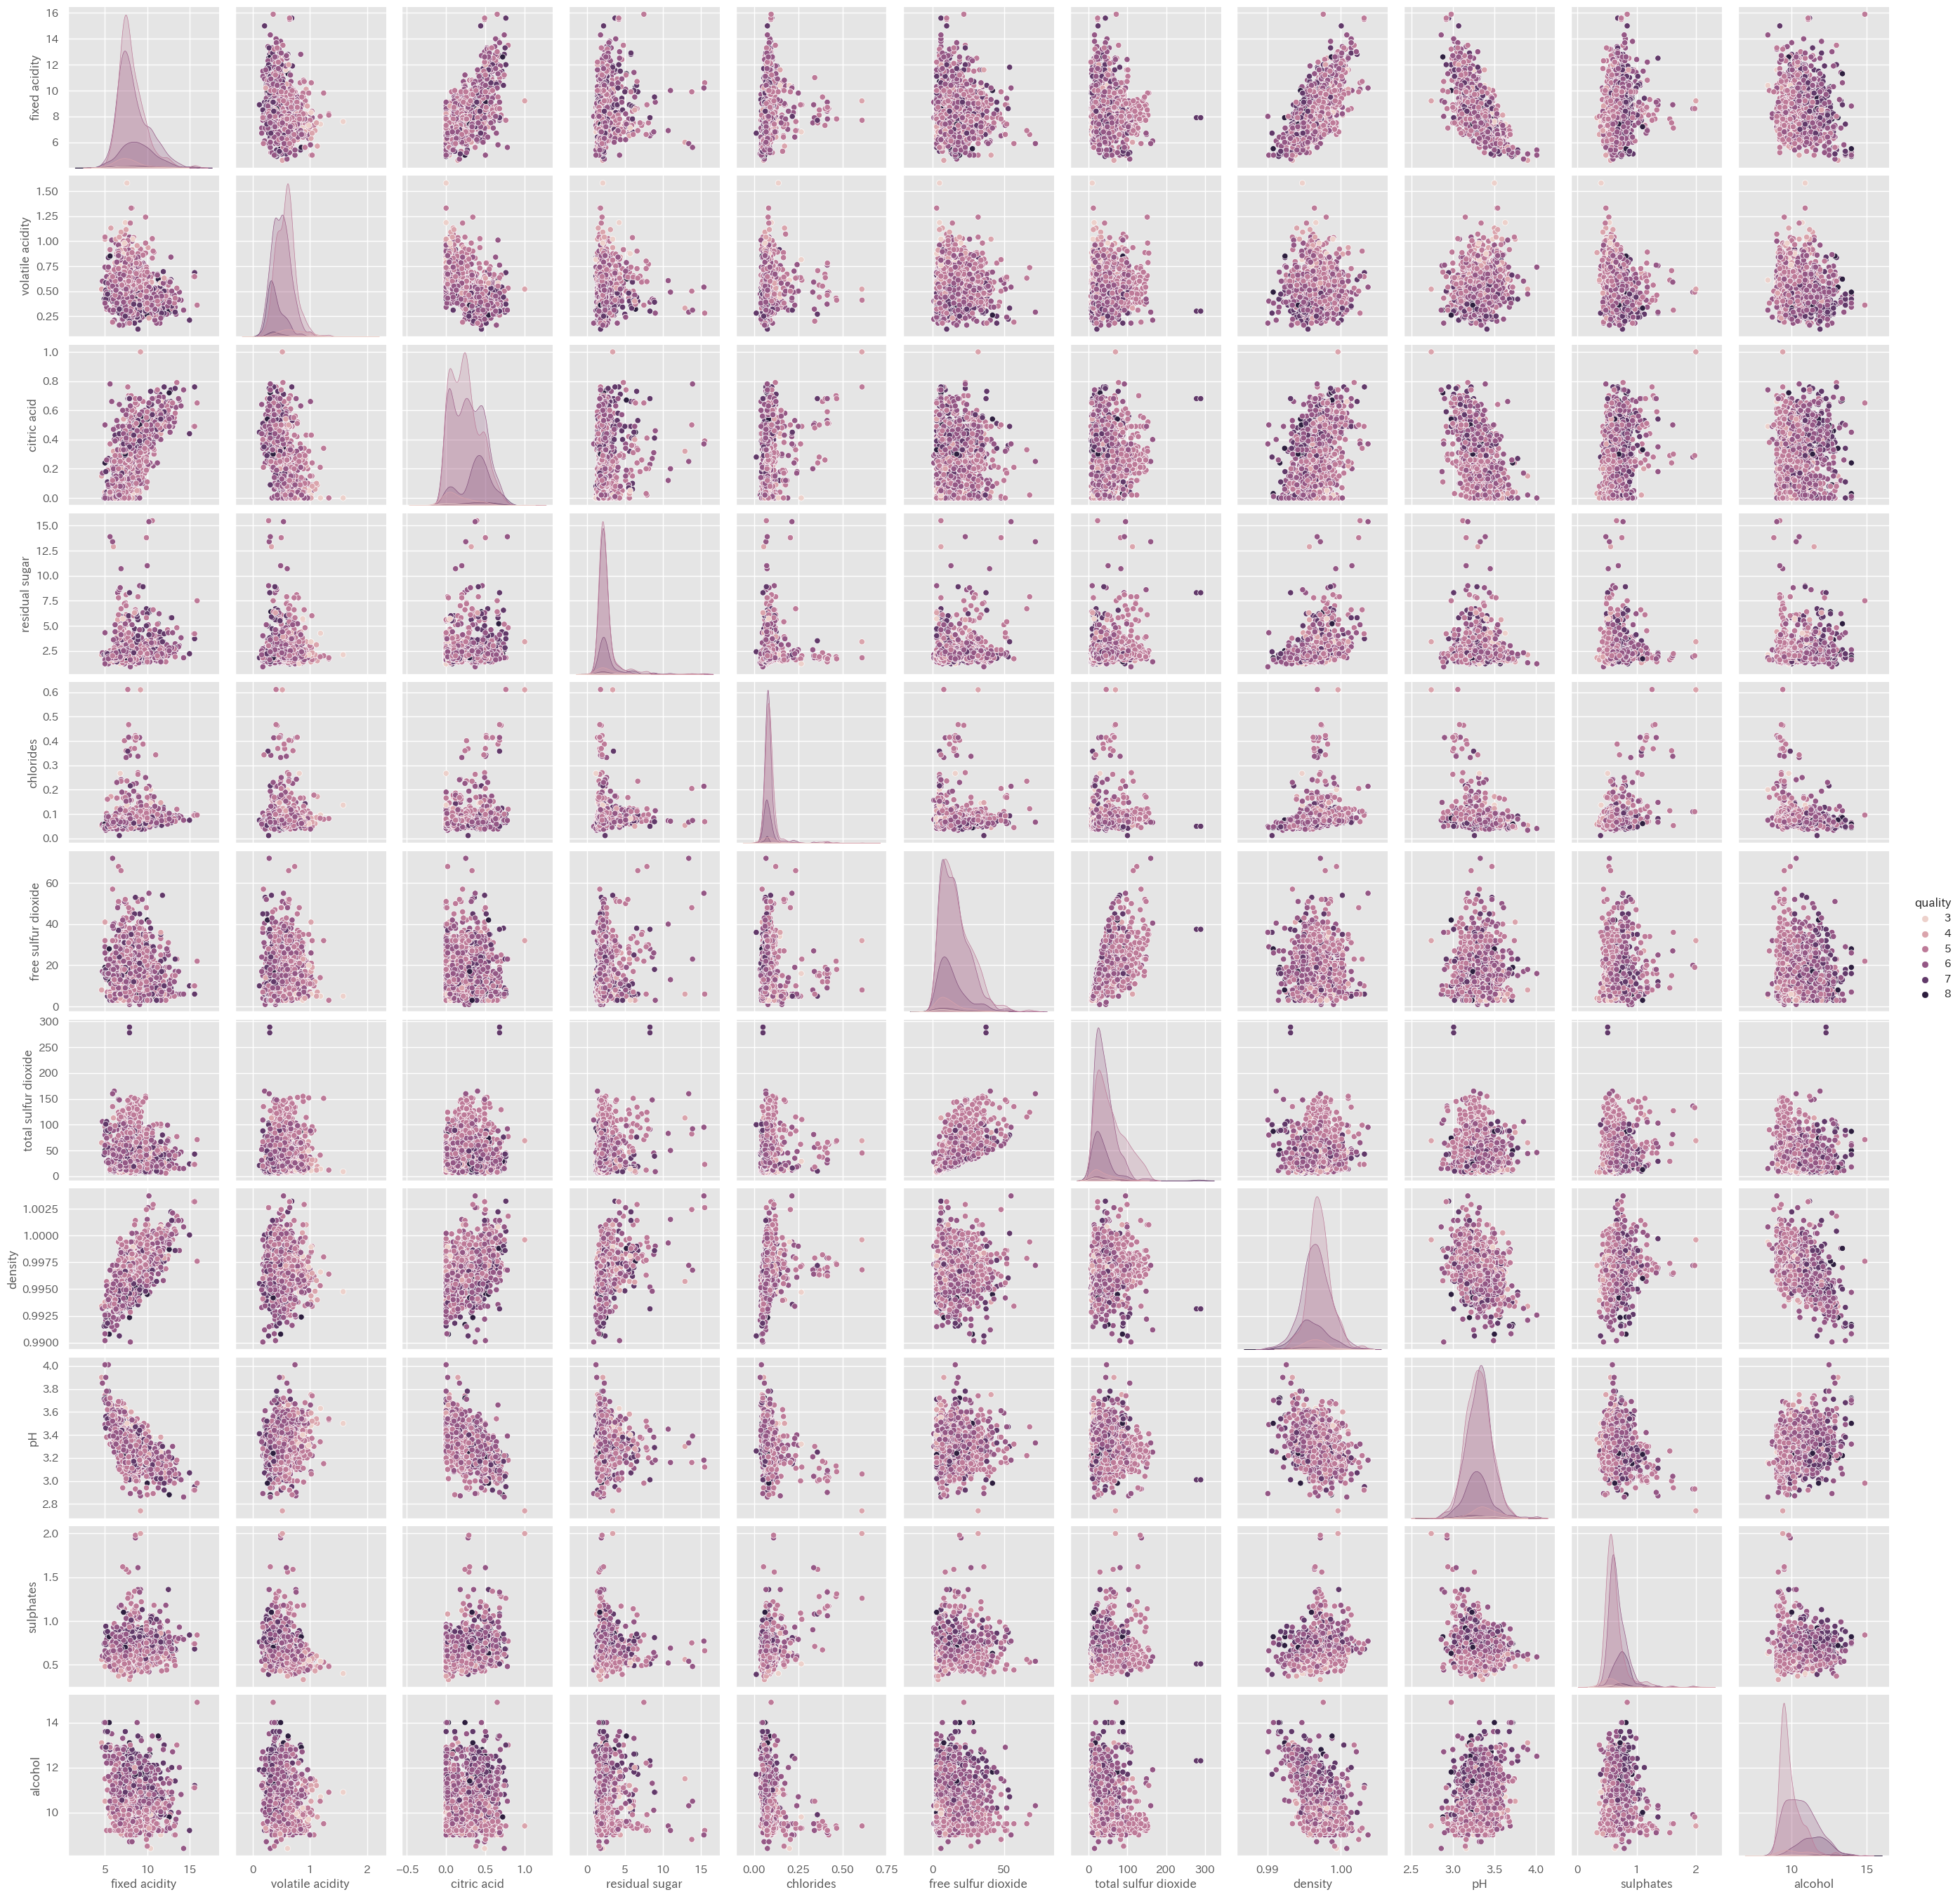

In [14]:
# 散布図行列
sns.pairplot(df, hue='quality')

In [23]:
# 相関係数表示
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

上記の結果から、正、負、無相関の結果を抽出する

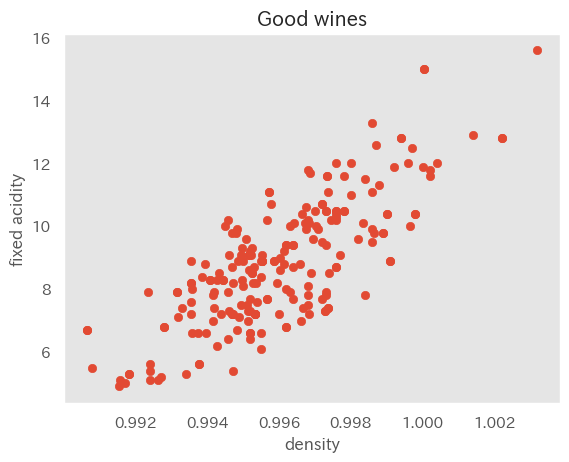

In [24]:
# 品質の良いワインだけ選択（データを絞り込む）
df1 = df[df['quality'] > 6]

# 不揮発酸濃度 と密度 で散布図で傾向をみる
X = df1['density'].values
Y = df1['fixed acidity'].values

plt.title('Good wines')
plt.scatter(X, Y)
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

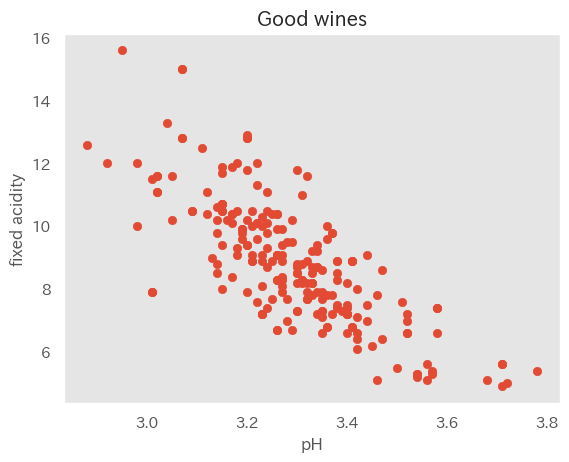

In [15]:
# 品質の良いワインだけ選択（データを絞り込む）
df1 = df[df['quality'] > 6]

# pH と不揮発酸濃度 で散布図で傾向をみる
X = df1['pH'].values
Y = df1['fixed acidity'].values

plt.title('Good wines')
plt.scatter(X, Y)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

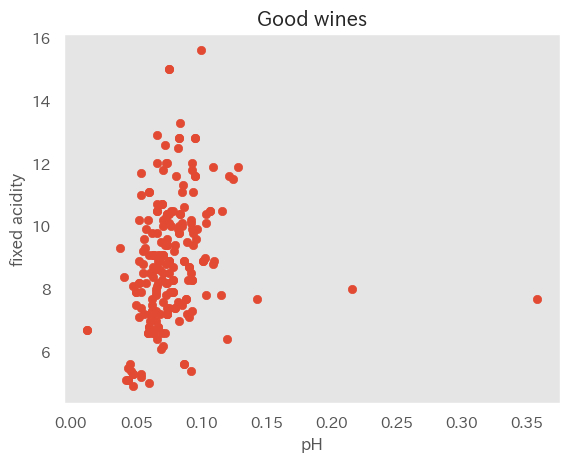

In [26]:
# 品質の良いワインだけ選択（データを絞り込む）
df1 = df[df['quality'] > 6]

# pH と塩化物濃度 で散布図で傾向をみる
X = df1['chlorides'].values
Y = df1['fixed acidity'].values

plt.title('Good wines')
plt.scatter(X, Y)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

以下は異なるやり方で散布図

0.9049139268028888


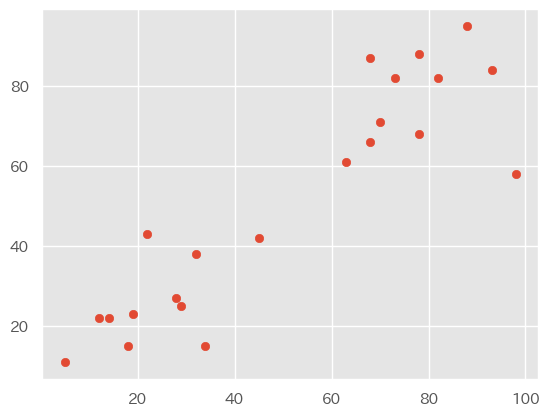

In [27]:
japanese = np.array([5, 73, 29, 63, 68, 28, 45, 78, 70, 93,82,88,98,68,78,12,32,18,19,22,34,14])
math = np.array([11, 82, 25, 61, 66, 27, 42, 88, 71, 84,82,95,58,87,68,22,38,15,23,43,15,22])

#相関係数の算出
correlation = np.corrcoef(japanese, math)

# グラフ
plt.scatter(japanese, math)

print(correlation[0,1])

#### 2-1-3-2 因果関係

因果関係は、一方を原因としてもう一方の値が変化することである。相関関係とは異なり、「原因⇒結果」という時系列を持った関係である。

![相関と因果.png](./img/相関と因果.png)

まとめると、
|関係|説明|
|---|---|
|相関関係|AとBの事柄になんらかの関連性があるもの|
|因果関係|Aを原因としてBが変動すること|

#### 2-1-3-3 回帰分析

回帰分析とは、ある変数$y$(目的変数)の変動を別の変数$x$(説明変数)の変動により説明・予測するための手法である。

主な用途としては以下がある。

|項目|説明|
|---|---|
|将来の予想|将来の計画に当てはめるために、現在までの情報から共通のルールを見出す|
|現在の理由|現在の情報のルールを見出して、事業の業績を分析る（要因分析）|

回帰分析で用いる用語の、実務用にかみくだいた定義は以下である。

|用語|説明|数式|
|---|---|---|
|目的変数|どうしてその値になるか、ルールを解き明かしたいもの、知りたいもの|$y$|
|説明変数|目的変数を説明するもの、知りたいものを計算するのに使うもの|$x_0,x_1,\dots,x_{k-1}$|
|予測モデル|説明変数を用いて目的変数を表す数式|$y=a_0 x_0 + a_1 x_1 + \dots + a_{k-1} x_{k-1} + b$|
|目的関数|予測した目的変数と実際の目的変数のギャップ|－|

回帰分析には以下がある

![回帰分析図.png](./img/回帰分析_図.png)

|回帰分析|説明|
|---|---|
|単回帰分析|説明変数が１つの分析手法|
|重回帰分析|説明変数が複数の分析手法。より複雑な分析が可能|

相関関係の説明で利用したデータを利用し、簡単に単回帰分析を確認する

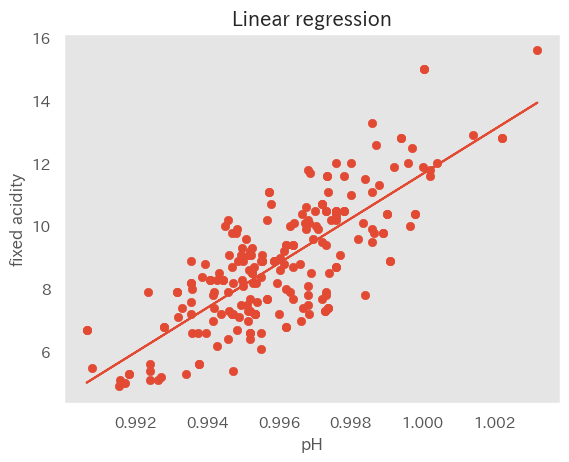

回帰係数=  [710.257]
切片=  -698.5907793737155
決定係数=  0.6110892036777595


In [28]:
from sklearn import linear_model

# データの読み込み
df = pd.read_csv('data\winequality-red.txt', sep='\t', index_col=0)

# 品質の良いワインだけ選択（データを絞り込む）
df1 = df[df['quality'] > 6]

# 不揮発酸濃度 と密度 で散布図で傾向をみる
X = df1['density'].values
Y = df1['fixed acidity'].values

clf = linear_model.LinearRegression()
X2 = [[x] for x in X]
clf.fit(X2, Y) # 予測モデルを作成

# 散布図
plt.scatter(X2, Y)

# 回帰直線
plt.title('Linear regression')
plt.plot(X2, clf.predict(X2))
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

print("回帰係数= ", clf.coef_)
print("切片= ", clf.intercept_)
print("決定係数= ", clf.score(X2, Y))

ライブラリ（sklearn）を利用せずに数学的に解くと以下である。

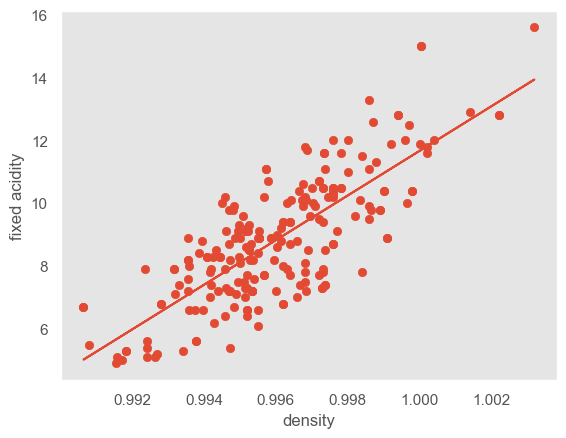

回帰係数=  710.257309114687
切片=  -698.5907793737152
決定係数=  0.6110892036777624


In [78]:
import math

# 平均
def Average(list):
    return sum(list) / len(list)

# 分散
def Variance(list):
    mean_list = Average(list)
    return sum([(x - mean_list)**2 for x in list]) / len(list)

# 標準偏差
def Standard_Deviation(list):
    return Variance(list)**0.5

# 共分散
def Covariance(list_x, list_y):
    mean_x = Average(list_x)
    mean_y = Average(list_y)
    return sum([(x - mean_x)*(y - mean_y) for x, y in zip(list_x, list_y)]) / len(list_x)

# 相関係数
def Correlation(list_x, list_y):
    std_x = Standard_Deviation(list_x)
    std_y = Standard_Deviation(list_y)
    return Covariance(list_x, list_y) / (std_x * std_y)

# 回帰直線の傾き
def a_fit(list_x, list_y):
    std_x = Standard_Deviation(list_x)
    std_y = Standard_Deviation(list_y)
    return Correlation(list_x, list_y) * (std_y / std_x)

# 回帰直線の切片
def b_fit(list_x, list_y):
    mean_x = Average(list_x)
    mean_y = Average(list_y)
    return mean_y - a_fit(list_x, list_y) * mean_x

# 回帰式（y=ax+b）
def f(x):
    return a_fit(X,Y) * x + b_fit(X,Y)

# 決定係数（相関係数^2）
def r2(list_x, list_y):
    return Correlation(list_x, list_y) ** 2

# データの読み込み
df = pd.read_csv('data\winequality-red.txt', sep='\t', index_col=0)

# 品質の良いワインだけ選択（データを絞り込む）
df1 = df[df['quality'] > 6]

# 不揮発酸濃度 と密度 で散布図で傾向をみる
X = df1['density'].values
Y = df1['fixed acidity'].values

# 描画（散布図と回帰直線）
plt.scatter(X, Y)
plt.plot(X, f(X))
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

print("回帰係数= ", a_fit(X, Y))
print("切片= ", b_fit(X, Y))
print("決定係数= ", r2(X, Y))


### 2-1-4 確率

#### 2-1-4-1 確率

確率とは、「ある事象がどの程度起こりやすいかを数値化したもの」である。すべての事象における確率を合計すると１(100%)になる。

例えば、コイン投げを考える。

表がでる確率は50%であり、裏がでる確率は50%である。コイン投げにおいて、表と裏の２通りしかパターンがないため、両方合わせて100%となる。

##### 2-1-4-1-1 統計量

##### 2-1-4-1-2 順列組み合わせ

#### 2-1-4-2 確率変数・確率分布

確率変数とは、「起こり得る事象の値」を指す。

例えば、サイコロを2回振ったケースを考える。

|項目|説明|
|---|---|
|確率変数|${ 2, 3, 4, \dots, 12 }$|
|確率分布|確率変数に対してそれぞれの発生確率<br>$\displaystyle \frac{1}{36}, \frac{2}{36}, \frac{4}{36}, \dots, \frac{1}{36}$|


##### 2-1-4-2-1 主要な確率密度関数

#### 2-1-4-3 事後確率

## 2-2 情報理論

### 2-2-1 情報理論

情報理論とは、数学を用いて情報の本質を明らかにするための学問である。もともとは通信技術において「どれだけ効率よく（短時間で）情報を伝えれるか」、「信頼性高く（ノイズなく）情報を届けられるか」を測るために利用されていた。この技術が「事象の予測」においても役立つため、機械学習を支える基本的な技術として利用されている。

### 2-2-2 自己情報量

自己情報量は、「ある事象が起きたと知ることで、どれだけの情報量が得られるのか」を数値化したものである。以下の数式で定義する。

$$
自己情報量：I(p) = - \log_2 p (単位：ビット)
$$

$\log$は**対数関数**を表し、$\log_2 p$は「2を何乗すると$p$になるか」を表す。

例えば、コイン投げで「表が出た」と知ることで得られる情報量は以下となる。

$$
I(\frac{1}{2}) = - \log_2 \frac{1}{2} = - \log_2 (2)^{-1} = 1
$$

また、トランプ(52枚)で「Aが出た」と知ることで得られる情報は以下となる。

$$
\begin{align}
I(\frac{4}{52}) &= - \log_2 \frac{4}{52} \\
&= - \log_2 \frac{1}{13} \\
&= \log_2 13 \\
&\fallingdotseq 3.7
\end{align}
$$

上記より、確率が小さい事象ほど、実際に起きたことを知ることで得られる情報が大きい。一方、確実に起きる事象(確率1の事象)を知ったとしても得られる情報量はゼロとなる。

日常に置き換えると、沖縄で晴れてもニュースになることはないが、雪が降ると大きなニュースになるかと。これは、沖縄では晴れの確率が高く(得られる情報量が少ない)、雪の確率が低い(得られる情報量が多い)ためである。

### 2-2-3 エントロピー

エントロピーは、熱力学および統計力学で使用される用語である。そこから観測対象から得られる情報に関係があることが発見され、情報理論にも応用されるようになった。

情報理論におけるエントロピーとは、「事象が起きた知ることによって、平均どれだけの情報量を得られるか」を数値化したものである。

「事象の起こる確率と自己情報量を掛け合わせたものの総和」で求まる。

$$
H(X) = \sum_{k=1}^n (- \log_2 p_k) ・ p_k
$$

例えば、晴れが75%、雨が25%としたときの天気のエントロピーは以下となる

$$
\begin{align}
H(X) &= \bigg ( - \log_2 \frac{3}{4} \bigg) ・ \frac{3}{4} + \bigg ( - \log_2 \frac{1}{4} \bigg) ・ \frac{1}{4} \\
&\fallingdotseq 0.41 ・ \frac{3}{4} + 2 ・ \frac{1}{4} \\
&\fallingdotseq 0.81
\end{align}
$$

### 2-2-4 相互情報量

### 2-2-5 交差エントロピー

## 2-3 線形代数

## 2-4 基礎解析